In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm, notebook
import cv2

In [2]:
import tensorflow
from tensorflow import keras

(5, 5, 3)


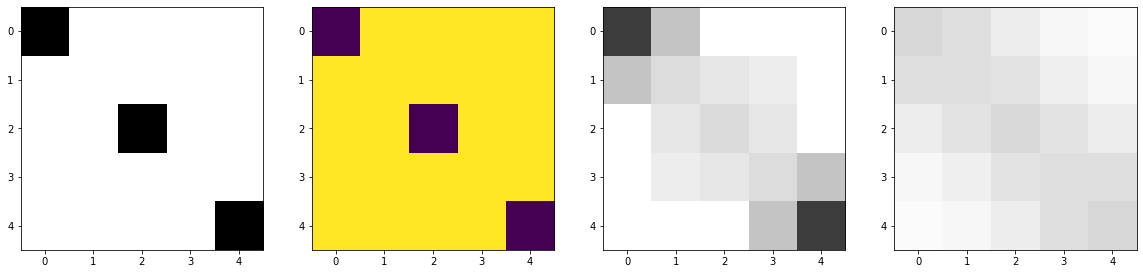

In [3]:
img = np.full((5,5,3),255,np.uint8)
img[0,0,:] = 0
img[2,2,:] = 0
img[4,4,:] = 0
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_resize = cv2.resize(
    img,(4,4),cv2.INTER_AREA  
)
img_resize = cv2.resize(
    img_resize,(5,5),cv2.INTER_AREA  
)

plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(img_gray)
plt.subplot(143)
plt.imshow( img_resize )
plt.subplot(144)
plt.imshow(
    cv2.GaussianBlur(img,(5,5),0)
)


testg = cv2.GaussianBlur(img,(5,5),0)
print(np.shape(testg))



---



In [4]:
iput = []
oput = []
tiput = []
toput = []
ws, hs, rws, rhs = 5,5,4,4

for i in notebook.tqdm_notebook(range(50000)):
    ncon = np.random.randint(0,ws*hs,1)
    img = np.full((ws,hs,3),255,np.uint8)
    while ncon>0:
        x, y = np.random.randint(0,ws,2)
        img[x,y,:] = 0
        ncon-= 1
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #rimg = cv2.GaussianBlur(img,(ws,hs),0)
    rimg = cv2.resize(img,(rws,rhs),cv2.INTER_AREA)
    rimg = cv2.resize(rimg,( ws, hs),cv2.INTER_AREA)
    iput.append(rimg.ravel())
    oput.append(img.ravel())

for i in notebook.tqdm_notebook(range(10000)):
    ncon = np.random.randint(0,ws*hs,1)
    img = np.full((ws,hs,3),255,np.uint8)
    while ncon>0:
        x, y = np.random.randint(0,ws,2)
        img[x,y,:] = 0
        ncon-= 1
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #rimg = cv2.GaussianBlur(img,(ws,hs),0)
    rimg = cv2.resize(img,(rws,rhs),cv2.INTER_AREA)
    rimg = cv2.resize(rimg,( ws, hs),cv2.INTER_AREA)
    tiput.append(rimg.ravel())
    toput.append(img.ravel())

print(
    np.shape(iput),np.shape(oput)
)
print(
    np.shape(tiput),np.shape(toput)
)



(50000, 25) (50000, 25)
(10000, 25) (10000, 25)




---



In [5]:
model = keras.Sequential([
                          keras.layers.InputLayer(input_shape=(25)),
                          keras.layers.Dense( 75, activation='relu'),
                          keras.layers.Dense(300, activation='relu'),
                          keras.layers.Dense( 25, activation='relu'),
                          keras.layers.ReLU(max_value=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 75)                1950      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               22800     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                7525      
_________________________________________________________________
re_lu (ReLU)                 (None, 25)                0         
Total params: 32,275
Trainable params: 32,275
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
logall = []

In [7]:
train_x = np.array(iput)/255
train_y = np.array(oput)/255

test_x = np.array(tiput)/255
test_y = np.array(toput)/255

print(np.shape(train_x), np.shape(train_y))
print(np.shape(test_x), np.shape(test_y))
print( np.max(train_x), np.max(train_y) )

(50000, 25) (50000, 25)
(10000, 25) (10000, 25)
1.0 1.0


In [8]:
%time log = model.fit(train_x, train_y, epochs=300)
logall.append(log)

Epoch 1/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1335 - accuracy: 0.5704
Epoch 2/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0813 - accuracy: 0.8512
Epoch 3/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0794 - accuracy: 0.8789
Epoch 4/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.9069
Epoch 5/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9571
Epoch 6/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9746
Epoch 7/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9811
Epoch 8/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9836
Epoch 9/300
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9868
Epoch 10/300
1563/1563 [==============================] - 3s 2ms/step - l

In [9]:
print(
    model.evaluate(test_x, test_y)
)

313/313 [==============================] - 0s 1ms/step - loss: 1.5368e-04 - accuracy: 1.0000
[0.00015367715968750417, 1.0]


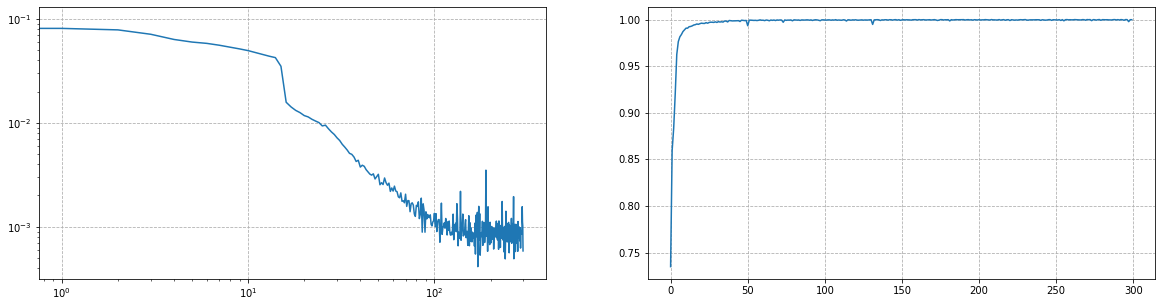

In [10]:
lss = []
acc = []
for i in logall:
    lss = np.append(lss, i.history['loss'])
    acc = np.append(acc, i.history['accuracy'])

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.loglog(lss)
plt.grid(ls='--')
plt.subplot(122)
plt.plot(acc)
plt.grid(ls='--')
plt.show()

Testing : 1


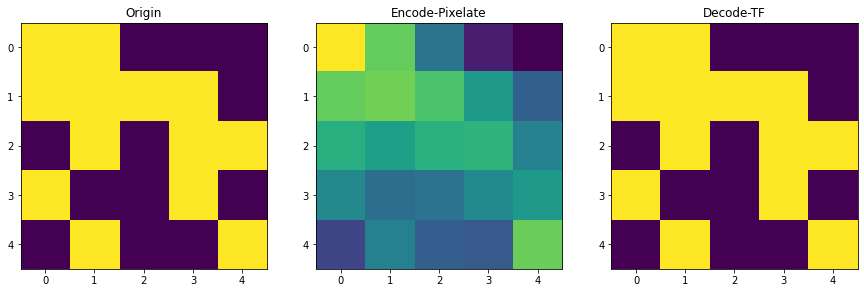

Testing : 2


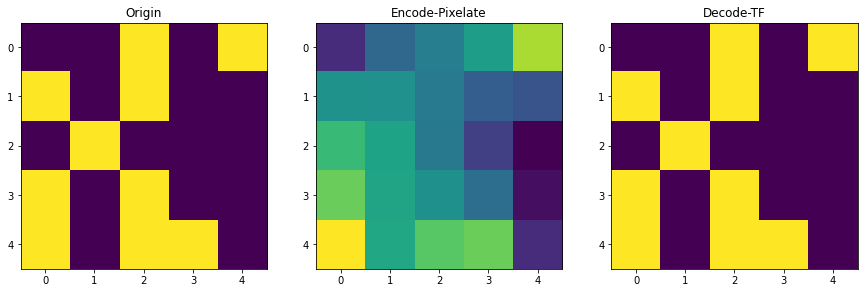

Testing : 3


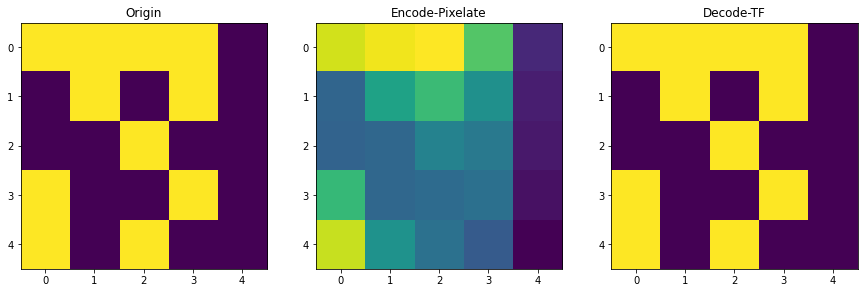

Testing : 4


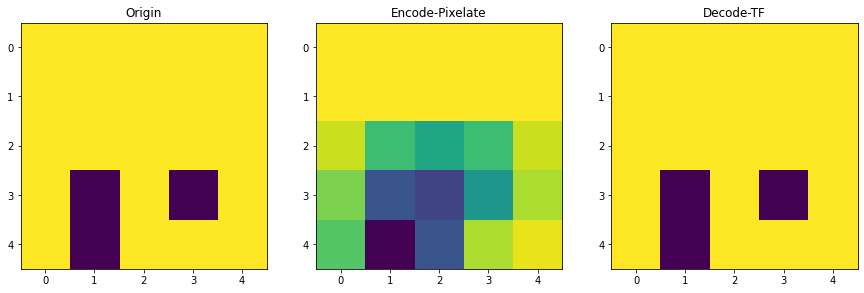

Testing : 5


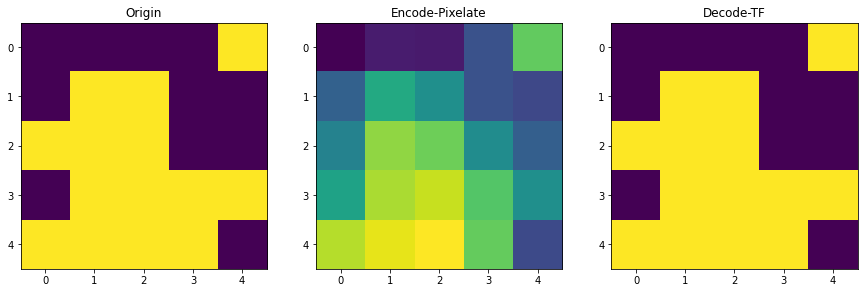

In [11]:
for i in range(5):
    print('Testing :', i+1)
    ncon = np.random.randint(0,ws*hs,1)
    img = np.full((ws,hs,3),255,np.uint8)
    while ncon>0:
        x, y = np.random.randint(0,ws,2)
        img[x,y,:] = 0
        ncon-= 1
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #rimg = cv2.GaussianBlur(img,(ws,hs),0)
    rimg = cv2.resize(img,(rws,rhs),cv2.INTER_AREA)
    rimg = cv2.resize(rimg,( ws, hs),cv2.INTER_AREA)
    out = model.predict( np.array([rimg.ravel()/255]) )

    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.title('Origin')
    plt.imshow(img/255)
    plt.subplot(132)
    plt.title('Encode-Pixelate')
    plt.imshow(rimg/255)
    plt.subplot(133)
    plt.title('Decode-TF')
    plt.imshow(
        np.reshape(out,(ws,hs))*255
    )
    plt.show()